## VAISHNAVI JAMDADE(TM39453)
### HOMEWORK 4

# NOTE : 
 ### Please use the input files provided in the Zip folder. 

### Importing required libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import idx2numpy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

### Converting the file into numpy array of dimensions (60000,28,28)

In [2]:
def convertfunc(file):
    arr = idx2numpy.convert_from_file(file)
    return arr

In [3]:
X_train=convertfunc('train-images.idx3-ubyte')
y_train=convertfunc('train-labels.idx1-ubyte')
X_test=convertfunc('t10k-images.idx3-ubyte')
y_test=convertfunc('t10k-labels.idx1-ubyte')

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape, y_train.shape

((10000, 28, 28), (60000,))

### Reshaping the dataset :

In [6]:
def reshapefunc(array,rows,columns):
    array=array.reshape(rows,columns)
    return array

In [7]:
X_train=reshapefunc(X_train,60000,784)
X_test=reshapefunc(X_test,10000,784)
#y_train=reshapefunc(y_train,1,60000)
#y_test=reshapefunc(y_test,1,10000)

In [8]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

### Splitting Training data into Training and Validation dataset

* For Question 3, Here we have split the original X_train(training dataset) into X_trainval and X_testval where we will train our model with 4 configurations on our X_trainval data, and then evaluate it on our Validation dataset that is, X_testval

In [9]:
X_trainval,X_testval,y_trainval,y_testval=train_test_split(X_train,y_train,test_size=0.3, random_state=42)

In [10]:
X_trainval.shape, X_testval.shape, y_trainval.shape,y_testval.shape

((42000, 784), (18000, 784), (42000,), (18000,))

### Using One hot label encoding for output labels:

In [11]:
y_trainnew=y_train
y_train.shape

(60000,)

In [12]:
y_train = pd.get_dummies(y_train)
y_train=np.array(y_train)

In [13]:
y_train.shape

(60000, 10)

### Using one hot label encoding for validation output labels:

In [14]:
y_trainval = pd.get_dummies(y_trainval)
y_trainval=np.array(y_trainval)

In [15]:
y_trainval.shape

(42000, 10)

In [16]:
y_train.shape

(60000, 10)

### Initializing weights and bias:

In [17]:
def initialize_weights(inputs, hNeurons, oNeurons):

    weights1=np.random.randn(inputs,hNeurons)*np.sqrt(1./inputs)    #784 rows 5 columns
    bias1=np.zeros((1, hNeurons))*np.sqrt(1./inputs)
    #hence x.w = 1,5 dimensions + bias [1,5]
    weights2=np.random.randn(hNeurons,oNeurons)*np.sqrt(1./hNeurons)
    #hence x.w= 5,10 dimensions + bias [1,10]
    bias2= np.zeros((1, oNeurons))*np.sqrt(1./hNeurons)

    #ouptut vecotr is going to be of dimensions [1,10] then softmax
    #W1.shape , b1.shape, W2.shape, b2.shape
    
    return weights1, bias1, weights2, bias2


### Sigmoid Activation Function:

In [18]:
def sigmoid(z):
    act = 1. / (1. + np.exp(-z))
    return act

### Tanh Activation Function :

In [19]:
def tanh(z):
    tanhact=(np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    return tanhact

### Softmax Activation function :

In [20]:
#Normalising the values:

def softmax(z):
    softact = np.exp(z)/np.sum(np.exp(z), axis=1,keepdims=True)                                       
    return softact


### Feed Forward Function :

In [21]:
def feedforward(X_t,W1,b1,W2,b2,actfunc):
    z1= np.dot(X_t,W1)+b1
    h1=actfunc(z1)
    
    z2=np.dot(h1,W2)+b2
    output=softmax(z2)
    return z1, h1, z2, output
        

### Error Function :

In [22]:
def error(ypred,y_t):     
    n_samples = y_t.shape[0]
    L = (ypred-y_t)/n_samples
    return L    

### Cross Entropy Loss Function:

In [23]:
def crossentropy(ypred,y_t):
    L_sum = np.sum(np.multiply(y_t, np.log(ypred)))
    num_samples = y_t.shape[0]
    L = -(1./num_samples) * L_sum

    return L

### Function to calculate Sigmoid Derivative:

In [24]:
def sigmoid_derivative(h1):
    deriv_s=h1*(1-h1)
    return deriv_s

### Function to calculate Tanh derivative :

In [25]:
def tanh_derivative(h1):
    deriv_t=1-h1**2
    return deriv_t

### Backpropagation Function to compute Gradient Information:

In [26]:
def backpropagation(h1,W2,ypred,y_t,X_t,derivfunc):
    
    #Calculate error
    L=error(ypred,y_t)
    
    # z1, h1, z2, output
    # z1, and z2 => dot products
    # h1 and output => activations
    change_output=L
    #dL/dW2
    delta_W2= np.dot(h1.T,change_output)
    
    #dL/db2
    delta_b2= np.sum(change_output,axis=0,keepdims=True)
    
    #dL/dh1
    delta_h1=np.dot(change_output,W2.T)

    change_h1= delta_h1*derivfunc(h1)
    
    #dL/dW1
    delta_W1= np.dot(X_t.T, change_h1)
    
    #dL/db1
    delta_b1= np.sum(change_h1,axis=0,keepdims=True)
    
    return delta_W2, delta_b2, delta_W1, delta_b1
    

### Function to update weights:

In [27]:
def update_weights(alpha,W1,b1,W2,b2,delta_W2,delta_b2,delta_W1,delta_b1):
    W2= W2- alpha*(delta_W2)
    b2= b2 - alpha*(delta_b2)
    W1= W1- alpha*(delta_W1)
    b1=b1- alpha*(delta_b1)
    
    return W2,b2,W1,b1

### Training Function:

In [28]:
def training(X_t,y_t,neurons,lr,iterations,actfunc,derivfunc):
    hNeurons=neurons                              #hidden neuron
    inputs=X_t.shape[1]                   #number of inputs
    oNeurons=y_t.shape[1]
    alpha= lr                       #learning rate
    epochs=iterations
    
    #retriving the actual labels for y_train:
    labely_train=np.argmax(y_t,axis=1)
    
    #initialize weights
    W1, b1, W2, b2= initialize_weights(inputs,hNeurons,oNeurons)
    li=[]
    listloss=[]
    for i in range(epochs):
        
        #feed forward
        dotprod1, h1, dotprod2, output=feedforward(X_t,W1,b1,W2,b2,actfunc)

        #back propogate
        delta_W2, delta_b2, delta_W1, delta_b1= backpropagation(h1,W2,output,y_t,X_t,derivfunc)
        
        #update weights using gradient descent
        W2,b2,W1,b1=update_weights(alpha,W1,b1,W2,b2,delta_W2,delta_b2,delta_W1,delta_b1)

        #again feed forward using updated weights
        dotprod1, h1, dotprod2, output=feedforward(X_t,W1,b1,W2,b2,actfunc)

        #Calculating Total Loss
        loss=crossentropy(output,y_t)                 # put in training func later
        print("Epoch {}: training loss = {}".format(i + 1,loss))
        listloss.append(loss)

        #Retrieving the corresponding class labels:
        labelpred=np.argmax(output,axis=1)
        
        #Training Accuracy:
        accuracy = round((accuracy_score(labely_train, labelpred)*100),2)
        print("Training Accuracy after Epoch {} : {}%".format(i+1, accuracy))
        li.append(accuracy)
        
    return W2,b2,W1,b1,li,listloss
        


### Testing Function:

In [29]:
def testing(W2,b2,W1,b1,X_t,y_t,actfunc):
    
    dotprod1, h1, dotprod2, output=feedforward(X_t,W1,b1,W2,b2,actfunc)   
    labely_test=y_t
    labelpred=np.argmax(output,axis=1)
    #accuracytest = round((accuracy_score(labely_test, labelpred)*100),2)        
    #print("Accuracy on Testing data : {}%".format(accuracytest))
    return labely_test,labelpred
        

### Function to measure accuracy:

In [30]:
def accuracy(labely_test, labelpred):
    accuracytest = round((accuracy_score(labely_test, labelpred)*100),2)        
    #print("Accuracy : {}%".format(accuracytest))
    return accuracytest

# Q3C :

## Running our model using 5 different configurations :

## Configuration 1 :
* Number of neurons = 64
* Learning rate = 0.01
* Iteratations =300
* Activation Function : Sigmoid

In [31]:
W2,b2,W1,b1,li1,loss1=training(X_trainval,y_trainval,64,0.01,300,sigmoid,sigmoid_derivative)

Epoch 1: training loss = 2.408074575616652
Training Accuracy after Epoch 1 : 13.56%
Epoch 2: training loss = 2.36158294528502
Training Accuracy after Epoch 2 : 15.2%
Epoch 3: training loss = 2.3194186165284343
Training Accuracy after Epoch 3 : 16.98%
Epoch 4: training loss = 2.2810020176082126
Training Accuracy after Epoch 4 : 18.59%
Epoch 5: training loss = 2.2452459333319634
Training Accuracy after Epoch 5 : 20.02%
Epoch 6: training loss = 2.2132401412323603
Training Accuracy after Epoch 6 : 21.36%
Epoch 7: training loss = 2.183938688626216
Training Accuracy after Epoch 7 : 22.67%
Epoch 8: training loss = 2.1566373436274633
Training Accuracy after Epoch 8 : 24.13%
Epoch 9: training loss = 2.1308479589976512
Training Accuracy after Epoch 9 : 25.4%
Epoch 10: training loss = 2.106635654717401
Training Accuracy after Epoch 10 : 26.59%
Epoch 11: training loss = 2.0837533603127305
Training Accuracy after Epoch 11 : 27.79%
Epoch 12: training loss = 2.061862434678089
Training Accuracy after 

Epoch 96: training loss = 1.3274660800518225
Training Accuracy after Epoch 96 : 73.06%
Epoch 97: training loss = 1.323007341760001
Training Accuracy after Epoch 97 : 73.19%
Epoch 98: training loss = 1.3186130961988844
Training Accuracy after Epoch 98 : 73.3%
Epoch 99: training loss = 1.3142081636739216
Training Accuracy after Epoch 99 : 73.47%
Epoch 100: training loss = 1.3098164742031255
Training Accuracy after Epoch 100 : 73.6%
Epoch 101: training loss = 1.3054798223391997
Training Accuracy after Epoch 101 : 73.75%
Epoch 102: training loss = 1.301221783885338
Training Accuracy after Epoch 102 : 73.86%
Epoch 103: training loss = 1.2970402525219236
Training Accuracy after Epoch 103 : 74.0%
Epoch 104: training loss = 1.292868537320424
Training Accuracy after Epoch 104 : 74.14%
Epoch 105: training loss = 1.2886925666811586
Training Accuracy after Epoch 105 : 74.22%
Epoch 106: training loss = 1.2846533097858244
Training Accuracy after Epoch 106 : 74.31%
Epoch 107: training loss = 1.280657

Epoch 189: training loss = 1.042319408944969
Training Accuracy after Epoch 189 : 80.6%
Epoch 190: training loss = 1.0402105918714244
Training Accuracy after Epoch 190 : 80.65%
Epoch 191: training loss = 1.0381083752289308
Training Accuracy after Epoch 191 : 80.69%
Epoch 192: training loss = 1.036012590774198
Training Accuracy after Epoch 192 : 80.74%
Epoch 193: training loss = 1.0339250010877448
Training Accuracy after Epoch 193 : 80.8%
Epoch 194: training loss = 1.0318458727411939
Training Accuracy after Epoch 194 : 80.88%
Epoch 195: training loss = 1.0297752762925376
Training Accuracy after Epoch 195 : 80.91%
Epoch 196: training loss = 1.0277175384905994
Training Accuracy after Epoch 196 : 80.93%
Epoch 197: training loss = 1.0256782230007528
Training Accuracy after Epoch 197 : 80.97%
Epoch 198: training loss = 1.0236583658291494
Training Accuracy after Epoch 198 : 81.02%
Epoch 199: training loss = 1.0216556185595633
Training Accuracy after Epoch 199 : 81.07%
Epoch 200: training loss 

Epoch 282: training loss = 0.8852398015277878
Training Accuracy after Epoch 282 : 83.95%
Epoch 283: training loss = 0.8838849955677771
Training Accuracy after Epoch 283 : 83.94%
Epoch 284: training loss = 0.8825393461454213
Training Accuracy after Epoch 284 : 83.97%
Epoch 285: training loss = 0.8812022563637559
Training Accuracy after Epoch 285 : 83.99%
Epoch 286: training loss = 0.8798732690669255
Training Accuracy after Epoch 286 : 84.0%
Epoch 287: training loss = 0.8785520196770993
Training Accuracy after Epoch 287 : 84.04%
Epoch 288: training loss = 0.8772381931660052
Training Accuracy after Epoch 288 : 84.05%
Epoch 289: training loss = 0.8759315705105697
Training Accuracy after Epoch 289 : 84.06%
Epoch 290: training loss = 0.8746320237327624
Training Accuracy after Epoch 290 : 84.11%
Epoch 291: training loss = 0.8733394228606772
Training Accuracy after Epoch 291 : 84.14%
Epoch 292: training loss = 0.8720536009326092
Training Accuracy after Epoch 292 : 84.17%
Epoch 293: training lo

## Test Loss using Configuration 1:

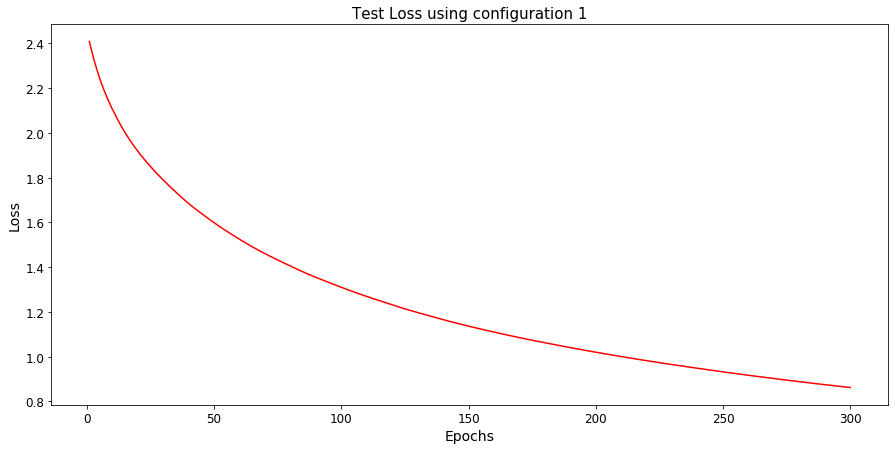

In [32]:
epochs = list(range(1,300+1))
loss= loss1
plt.figure(figsize=(15,7))
plt.title('Test Loss using configuration 1', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Loss', fontsize=14)
plt.tick_params(labelsize=12);
#plt.scatter(epochs,loss,alpha=1,c='green')
plt.plot(epochs,loss,c='red')


### Plotting training accuracies :

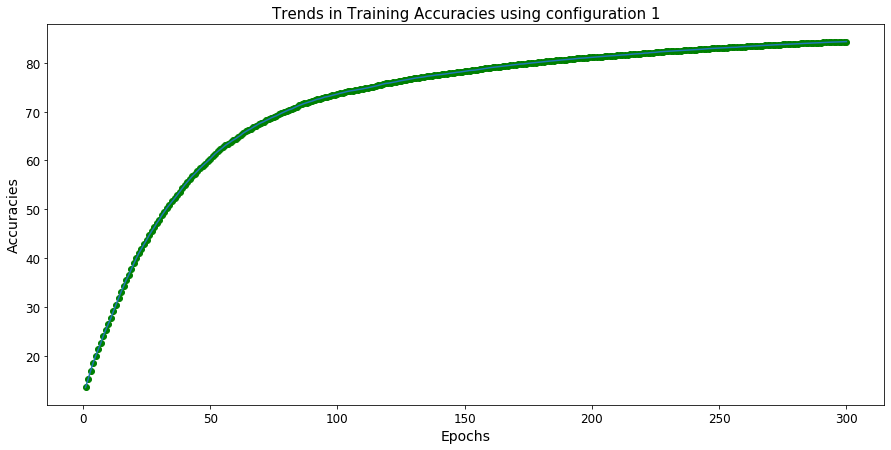

In [33]:
epochs = list(range(1,300+1))
accuracies= li1
plt.figure(figsize=(15,7))
plt.title('Trends in Training Accuracies using configuration 1', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(epochs,accuracies,alpha=1,c='green')
plt.plot(epochs,accuracies)


### Evaluating on Validation data using configuration 1:

In [34]:
labely_test,labelpred=testing(W2,b2,W1,b1,X_testval,y_testval,sigmoid)
accuracy_val=accuracy(labely_test, labelpred)
print("Accuracy on Validation data using configuration 1: {}%".format(accuracy_val))
acc1=accuracy_val

Accuracy on Validation data using configuration 1: 83.69%


## Configuration 2 :
* Number of neurons = 64
* Learning rate = 0.05
* Iteratations =300
* Activation Function : Sigmoid

In [35]:
W2,b2,W1,b1,li2,loss2=training(X_trainval,y_trainval,64,0.05,300,sigmoid, sigmoid_derivative)

Epoch 1: training loss = 2.330201593962811
Training Accuracy after Epoch 1 : 12.41%
Epoch 2: training loss = 2.2231502865389543
Training Accuracy after Epoch 2 : 20.07%
Epoch 3: training loss = 2.1426258463086008
Training Accuracy after Epoch 3 : 26.88%
Epoch 4: training loss = 2.073130606005176
Training Accuracy after Epoch 4 : 33.01%
Epoch 5: training loss = 2.0125711626305396
Training Accuracy after Epoch 5 : 38.66%
Epoch 6: training loss = 1.9579674054587513
Training Accuracy after Epoch 6 : 43.2%
Epoch 7: training loss = 1.908226576475164
Training Accuracy after Epoch 7 : 47.17%
Epoch 8: training loss = 1.8631000327305773
Training Accuracy after Epoch 8 : 50.36%
Epoch 9: training loss = 1.821413336501876
Training Accuracy after Epoch 9 : 53.23%
Epoch 10: training loss = 1.78126255737192
Training Accuracy after Epoch 10 : 55.8%
Epoch 11: training loss = 1.743905958753646
Training Accuracy after Epoch 11 : 57.87%
Epoch 12: training loss = 1.7098041852954402
Training Accuracy after E

Epoch 96: training loss = 0.7241605633512103
Training Accuracy after Epoch 96 : 86.35%
Epoch 97: training loss = 0.7204158392598546
Training Accuracy after Epoch 97 : 86.39%
Epoch 98: training loss = 0.7162394790406421
Training Accuracy after Epoch 98 : 86.48%
Epoch 99: training loss = 0.7123965280292638
Training Accuracy after Epoch 99 : 86.48%
Epoch 100: training loss = 0.7084509416090928
Training Accuracy after Epoch 100 : 86.62%
Epoch 101: training loss = 0.7048233078750473
Training Accuracy after Epoch 101 : 86.64%
Epoch 102: training loss = 0.7006797932626188
Training Accuracy after Epoch 102 : 86.73%
Epoch 103: training loss = 0.6967389550417794
Training Accuracy after Epoch 103 : 86.79%
Epoch 104: training loss = 0.6932918045462305
Training Accuracy after Epoch 104 : 86.84%
Epoch 105: training loss = 0.6898579548886452
Training Accuracy after Epoch 105 : 86.91%
Epoch 106: training loss = 0.6866720645958986
Training Accuracy after Epoch 106 : 86.94%
Epoch 107: training loss = 0.

Epoch 189: training loss = 0.5041431072860265
Training Accuracy after Epoch 189 : 89.52%
Epoch 190: training loss = 0.502699783280947
Training Accuracy after Epoch 190 : 89.58%
Epoch 191: training loss = 0.5026959619286727
Training Accuracy after Epoch 191 : 89.48%
Epoch 192: training loss = 0.5017323777767101
Training Accuracy after Epoch 192 : 89.48%
Epoch 193: training loss = 0.5002306884436893
Training Accuracy after Epoch 193 : 89.51%
Epoch 194: training loss = 0.49784804911643826
Training Accuracy after Epoch 194 : 89.53%
Epoch 195: training loss = 0.4957312642574915
Training Accuracy after Epoch 195 : 89.67%
Epoch 196: training loss = 0.4939921171911736
Training Accuracy after Epoch 196 : 89.71%
Epoch 197: training loss = 0.4925275648238533
Training Accuracy after Epoch 197 : 89.7%
Epoch 198: training loss = 0.49085324849583745
Training Accuracy after Epoch 198 : 89.75%
Epoch 199: training loss = 0.4896599811545994
Training Accuracy after Epoch 199 : 89.76%
Epoch 200: training l

Epoch 281: training loss = 0.41049335034099177
Training Accuracy after Epoch 281 : 90.87%
Epoch 282: training loss = 0.4099198043534113
Training Accuracy after Epoch 282 : 90.88%
Epoch 283: training loss = 0.4105371678467785
Training Accuracy after Epoch 283 : 90.81%
Epoch 284: training loss = 0.40989092226479773
Training Accuracy after Epoch 284 : 90.84%
Epoch 285: training loss = 0.40770027465744785
Training Accuracy after Epoch 285 : 90.86%
Epoch 286: training loss = 0.40703359817730583
Training Accuracy after Epoch 286 : 90.95%
Epoch 287: training loss = 0.40642627119948355
Training Accuracy after Epoch 287 : 90.86%
Epoch 288: training loss = 0.40637564480545924
Training Accuracy after Epoch 288 : 90.97%
Epoch 289: training loss = 0.40616102393350445
Training Accuracy after Epoch 289 : 90.84%
Epoch 290: training loss = 0.40488702345058736
Training Accuracy after Epoch 290 : 90.99%
Epoch 291: training loss = 0.40487637724008363
Training Accuracy after Epoch 291 : 90.88%
Epoch 292: t

## Test Loss using configuration 2:

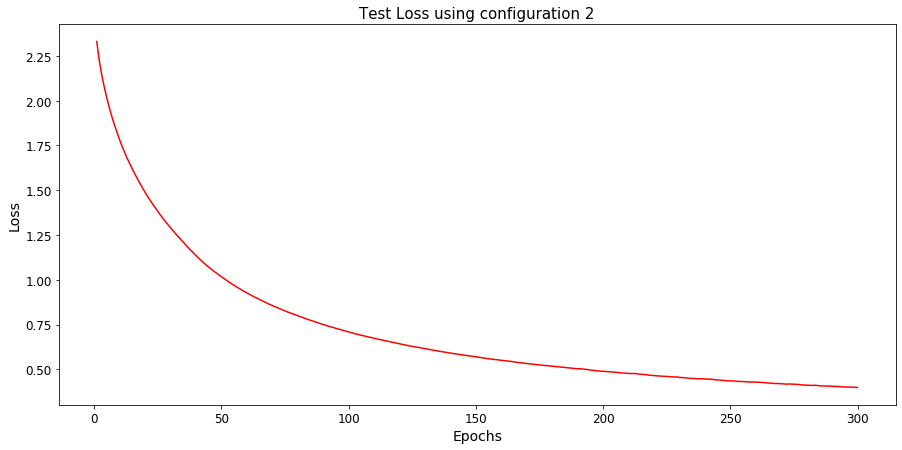

In [36]:
epochs = list(range(1,300+1))
loss= loss2
plt.figure(figsize=(15,7))
plt.title('Test Loss using configuration 2', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Loss', fontsize=14)
plt.tick_params(labelsize=12);
#plt.scatter(epochs,loss,alpha=1,c='green')
plt.plot(epochs,loss,c='red')


## Plotting training accuracies :

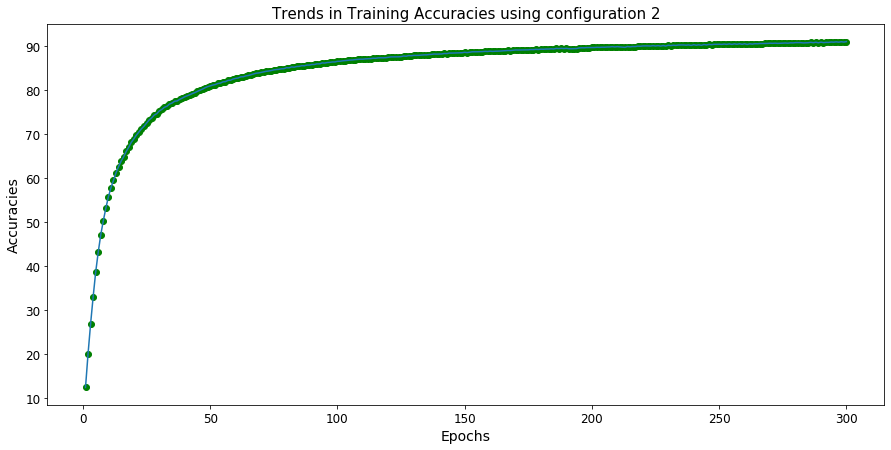

In [37]:
epochs = list(range(1,300+1))
accuracies= li2
plt.figure(figsize=(15,7))
plt.title('Trends in Training Accuracies using configuration 2', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(epochs,accuracies,alpha=1,c='green')
plt.plot(epochs,accuracies)

### Evaluating on Validation data using configuration 2:

In [38]:
labely_test,labelpred=testing(W2,b2,W1,b1,X_testval,y_testval,sigmoid)
accuracy_val=accuracy(labely_test, labelpred)
print("Accuracy on Validation data using configuration 2: {}%".format(accuracy_val))
acc2=accuracy_val

Accuracy on Validation data using configuration 2: 89.73%


In [39]:
acc2

89.73

### Configuration 3 :
* Number of neurons = 128
* Learning rate = 0.01
* Iteratations =300
* Activation Function : Sigmoid

In [40]:
W2,b2,W1,b1,li3,loss3=training(X_trainval,y_trainval,128,0.01,300,sigmoid,sigmoid_derivative)

Epoch 1: training loss = 2.4124894729149156
Training Accuracy after Epoch 1 : 12.15%
Epoch 2: training loss = 2.370513503416662
Training Accuracy after Epoch 2 : 13.5%
Epoch 3: training loss = 2.3327871810895853
Training Accuracy after Epoch 3 : 14.96%
Epoch 4: training loss = 2.2980739239684196
Training Accuracy after Epoch 4 : 16.31%
Epoch 5: training loss = 2.266482188902873
Training Accuracy after Epoch 5 : 17.86%
Epoch 6: training loss = 2.236442199254068
Training Accuracy after Epoch 6 : 19.57%
Epoch 7: training loss = 2.208711447861841
Training Accuracy after Epoch 7 : 21.2%
Epoch 8: training loss = 2.1827309198731997
Training Accuracy after Epoch 8 : 22.95%
Epoch 9: training loss = 2.157952229005384
Training Accuracy after Epoch 9 : 24.64%
Epoch 10: training loss = 2.134089593293997
Training Accuracy after Epoch 10 : 26.35%
Epoch 11: training loss = 2.1109074531677674
Training Accuracy after Epoch 11 : 28.06%
Epoch 12: training loss = 2.0887683554914447
Training Accuracy after 

Epoch 96: training loss = 1.2466179127212869
Training Accuracy after Epoch 96 : 76.15%
Epoch 97: training loss = 1.2414004336514282
Training Accuracy after Epoch 97 : 76.3%
Epoch 98: training loss = 1.2362406564810142
Training Accuracy after Epoch 98 : 76.42%
Epoch 99: training loss = 1.231143295733968
Training Accuracy after Epoch 99 : 76.53%
Epoch 100: training loss = 1.2261151457158939
Training Accuracy after Epoch 100 : 76.66%
Epoch 101: training loss = 1.2211461522426195
Training Accuracy after Epoch 101 : 76.8%
Epoch 102: training loss = 1.216229335255364
Training Accuracy after Epoch 102 : 76.91%
Epoch 103: training loss = 1.2113584691199561
Training Accuracy after Epoch 103 : 77.09%
Epoch 104: training loss = 1.2065384629433629
Training Accuracy after Epoch 104 : 77.2%
Epoch 105: training loss = 1.2017783307235381
Training Accuracy after Epoch 105 : 77.29%
Epoch 106: training loss = 1.1970799404503796
Training Accuracy after Epoch 106 : 77.41%
Epoch 107: training loss = 1.19245

Epoch 189: training loss = 0.9170968115804049
Training Accuracy after Epoch 189 : 83.0%
Epoch 190: training loss = 0.9147093401016003
Training Accuracy after Epoch 190 : 83.05%
Epoch 191: training loss = 0.9123489131990107
Training Accuracy after Epoch 191 : 83.09%
Epoch 192: training loss = 0.9100057518509836
Training Accuracy after Epoch 192 : 83.12%
Epoch 193: training loss = 0.9076757729047621
Training Accuracy after Epoch 193 : 83.18%
Epoch 194: training loss = 0.9053556990202073
Training Accuracy after Epoch 194 : 83.2%
Epoch 195: training loss = 0.9030504607668759
Training Accuracy after Epoch 195 : 83.24%
Epoch 196: training loss = 0.9007684097628337
Training Accuracy after Epoch 196 : 83.25%
Epoch 197: training loss = 0.898511499585132
Training Accuracy after Epoch 197 : 83.29%
Epoch 198: training loss = 0.896276027336998
Training Accuracy after Epoch 198 : 83.31%
Epoch 199: training loss = 0.8940545696850254
Training Accuracy after Epoch 199 : 83.36%
Epoch 200: training loss 

Epoch 282: training loss = 0.7504339424366101
Training Accuracy after Epoch 282 : 85.61%
Epoch 283: training loss = 0.7490709152753782
Training Accuracy after Epoch 283 : 85.63%
Epoch 284: training loss = 0.7477152049743413
Training Accuracy after Epoch 284 : 85.65%
Epoch 285: training loss = 0.7463670197295771
Training Accuracy after Epoch 285 : 85.66%
Epoch 286: training loss = 0.7450264178424882
Training Accuracy after Epoch 286 : 85.68%
Epoch 287: training loss = 0.7436934558064344
Training Accuracy after Epoch 287 : 85.7%
Epoch 288: training loss = 0.7423679477629361
Training Accuracy after Epoch 288 : 85.72%
Epoch 289: training loss = 0.7410493092424921
Training Accuracy after Epoch 289 : 85.74%
Epoch 290: training loss = 0.7397368175442874
Training Accuracy after Epoch 290 : 85.78%
Epoch 291: training loss = 0.7384300046498331
Training Accuracy after Epoch 291 : 85.78%
Epoch 292: training loss = 0.7371289390943495
Training Accuracy after Epoch 292 : 85.81%
Epoch 293: training lo

## Test Loss using configuration 3:

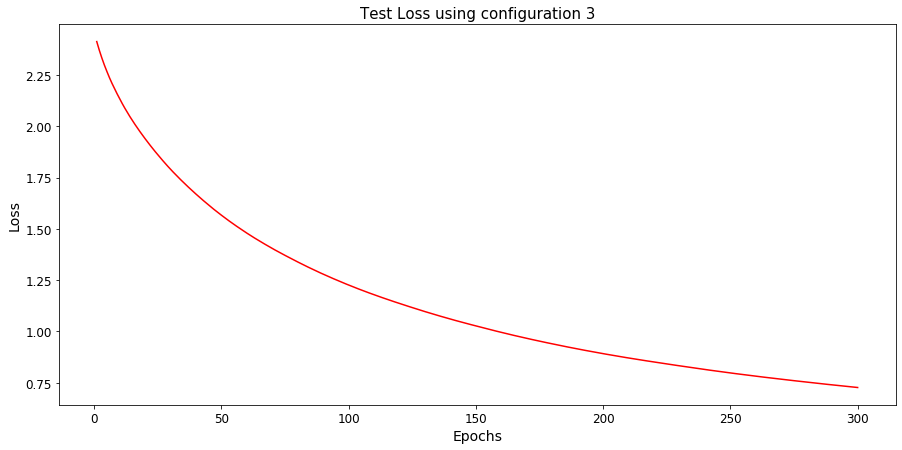

In [41]:
epochs = list(range(1,300+1))
loss= loss3
plt.figure(figsize=(15,7))
plt.title('Test Loss using configuration 3', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Loss', fontsize=14)
plt.tick_params(labelsize=12);
#plt.scatter(epochs,loss,alpha=1,c='green')
plt.plot(epochs,loss,c='red')


### Plotting training accuracies :

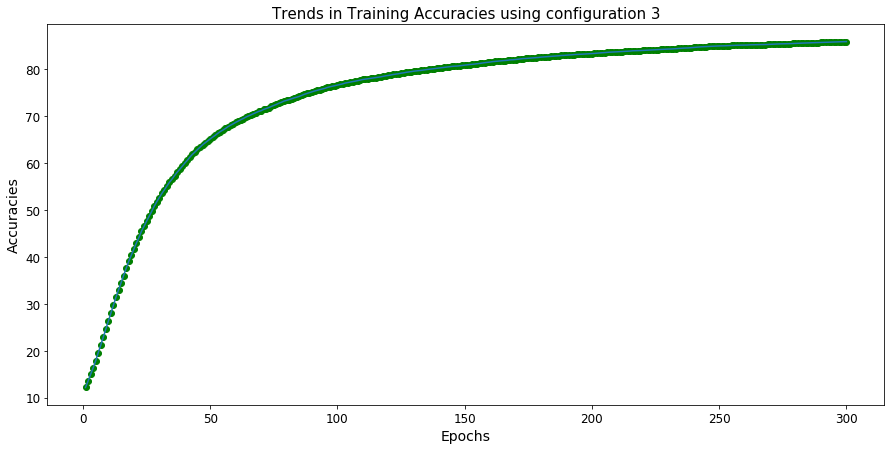

In [42]:
epochs = list(range(1,300+1))
accuracies= li3
plt.figure(figsize=(15,7))
plt.title('Trends in Training Accuracies using configuration 3', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(epochs,accuracies,alpha=1,c='green')
plt.plot(epochs,accuracies)

### Evaluating on Validation data using configuration 3:

In [43]:
labely_test,labelpred=testing(W2,b2,W1,b1,X_testval,y_testval,sigmoid)
accuracy_val=accuracy(labely_test, labelpred)
print("Accuracy on Validation data using configuration 3: {}%".format(accuracy_val))
acc3=accuracy_val

Accuracy on Validation data using configuration 3: 85.09%


### Configuration 4 :
* Number of neurons = 128
* Learning rate = 0.05
* Iteratations =300
* Activation Function : Sigmoid

In [44]:
W2,b2,W1,b1,li4,loss4=training(X_trainval,y_trainval,128,0.01,300,sigmoid,sigmoid_derivative)

Epoch 1: training loss = 2.4148801809498335
Training Accuracy after Epoch 1 : 9.89%
Epoch 2: training loss = 2.3803014581804405
Training Accuracy after Epoch 2 : 11.11%
Epoch 3: training loss = 2.347410498546729
Training Accuracy after Epoch 3 : 12.38%
Epoch 4: training loss = 2.3159720361212304
Training Accuracy after Epoch 4 : 13.85%
Epoch 5: training loss = 2.2856250812739067
Training Accuracy after Epoch 5 : 15.33%
Epoch 6: training loss = 2.2569713460257086
Training Accuracy after Epoch 6 : 16.97%
Epoch 7: training loss = 2.229364751009646
Training Accuracy after Epoch 7 : 18.86%
Epoch 8: training loss = 2.2029160044451332
Training Accuracy after Epoch 8 : 20.82%
Epoch 9: training loss = 2.1780272526387097
Training Accuracy after Epoch 9 : 22.75%
Epoch 10: training loss = 2.1537587535613296
Training Accuracy after Epoch 10 : 24.84%
Epoch 11: training loss = 2.130278581434887
Training Accuracy after Epoch 11 : 26.79%
Epoch 12: training loss = 2.1080489693885043
Training Accuracy af

Epoch 96: training loss = 1.2286368483685635
Training Accuracy after Epoch 96 : 75.51%
Epoch 97: training loss = 1.2235011323286231
Training Accuracy after Epoch 97 : 75.64%
Epoch 98: training loss = 1.2184277317641685
Training Accuracy after Epoch 98 : 75.78%
Epoch 99: training loss = 1.213401235712898
Training Accuracy after Epoch 99 : 75.94%
Epoch 100: training loss = 1.2084181525761017
Training Accuracy after Epoch 100 : 76.08%
Epoch 101: training loss = 1.2034965666595911
Training Accuracy after Epoch 101 : 76.2%
Epoch 102: training loss = 1.1986504277376335
Training Accuracy after Epoch 102 : 76.3%
Epoch 103: training loss = 1.19387054599665
Training Accuracy after Epoch 103 : 76.45%
Epoch 104: training loss = 1.1891376647084049
Training Accuracy after Epoch 104 : 76.59%
Epoch 105: training loss = 1.184434569605233
Training Accuracy after Epoch 105 : 76.72%
Epoch 106: training loss = 1.1797546868425755
Training Accuracy after Epoch 106 : 76.8%
Epoch 107: training loss = 1.1751189

Epoch 189: training loss = 0.9043574196791107
Training Accuracy after Epoch 189 : 82.7%
Epoch 190: training loss = 0.9020312740635655
Training Accuracy after Epoch 190 : 82.74%
Epoch 191: training loss = 0.8997060191256073
Training Accuracy after Epoch 191 : 82.76%
Epoch 192: training loss = 0.8973836499284715
Training Accuracy after Epoch 192 : 82.81%
Epoch 193: training loss = 0.8950717454497541
Training Accuracy after Epoch 193 : 82.84%
Epoch 194: training loss = 0.892775120713012
Training Accuracy after Epoch 194 : 82.87%
Epoch 195: training loss = 0.8904961402548666
Training Accuracy after Epoch 195 : 82.92%
Epoch 196: training loss = 0.8882387683690636
Training Accuracy after Epoch 196 : 82.97%
Epoch 197: training loss = 0.886002782841502
Training Accuracy after Epoch 197 : 83.02%
Epoch 198: training loss = 0.8837832502743483
Training Accuracy after Epoch 198 : 83.08%
Epoch 199: training loss = 0.8815761670625264
Training Accuracy after Epoch 199 : 83.12%
Epoch 200: training loss

Epoch 282: training loss = 0.7389221731489218
Training Accuracy after Epoch 282 : 85.51%
Epoch 283: training loss = 0.7375762020247835
Training Accuracy after Epoch 283 : 85.53%
Epoch 284: training loss = 0.7362368330075456
Training Accuracy after Epoch 284 : 85.53%
Epoch 285: training loss = 0.7349045715309178
Training Accuracy after Epoch 285 : 85.57%
Epoch 286: training loss = 0.7335798546042588
Training Accuracy after Epoch 286 : 85.59%
Epoch 287: training loss = 0.7322630823213774
Training Accuracy after Epoch 287 : 85.61%
Epoch 288: training loss = 0.7309545874032106
Training Accuracy after Epoch 288 : 85.65%
Epoch 289: training loss = 0.7296545086148887
Training Accuracy after Epoch 289 : 85.66%
Epoch 290: training loss = 0.7283627023979702
Training Accuracy after Epoch 290 : 85.66%
Epoch 291: training loss = 0.7270788108689324
Training Accuracy after Epoch 291 : 85.69%
Epoch 292: training loss = 0.7258024134825649
Training Accuracy after Epoch 292 : 85.7%
Epoch 293: training lo

## Test Loss using configuration 4:

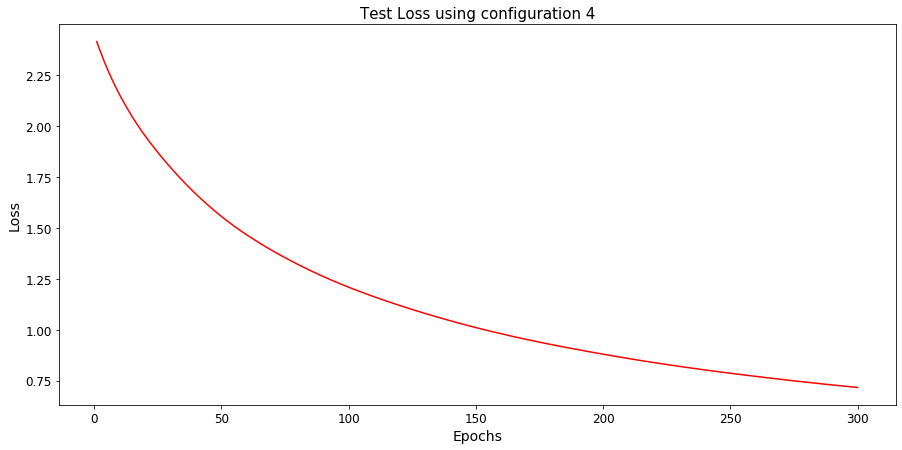

In [45]:
epochs = list(range(1,300+1))
loss= loss4
plt.figure(figsize=(15,7))
plt.title('Test Loss using configuration 4', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Loss', fontsize=14)
plt.tick_params(labelsize=12);
#plt.scatter(epochs,loss,alpha=1,c='green')
plt.plot(epochs,loss,c='red')


### Plotting training accuracies :

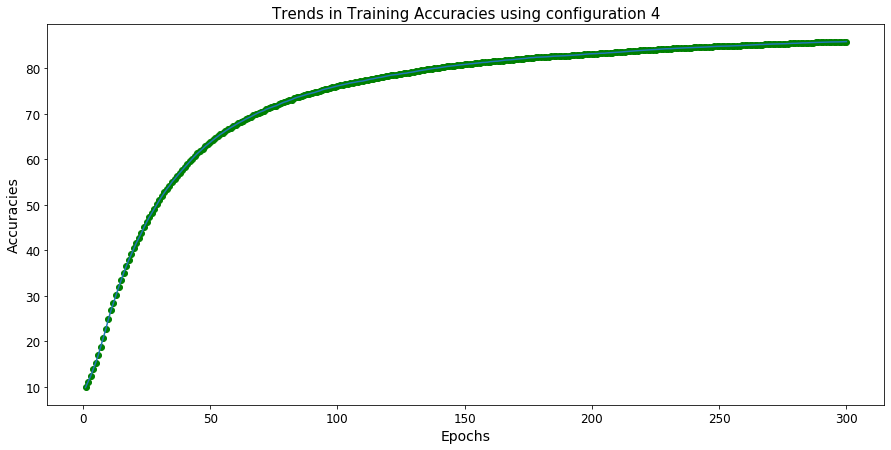

In [46]:
epochs = list(range(1,300+1))
accuracies= li4
plt.figure(figsize=(15,7))
plt.title('Trends in Training Accuracies using configuration 4', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(epochs,accuracies,alpha=1,c='green')
plt.plot(epochs,accuracies)

### Evaluating on Validation data using configuration 4:

In [47]:
labely_test,labelpred=testing(W2,b2,W1,b1,X_testval,y_testval,sigmoid)
accuracy_val=accuracy(labely_test, labelpred)
print("Accuracy on Validation data using configuration 4: {}%".format(accuracy_val))
acc4=accuracy_val

Accuracy on Validation data using configuration 4: 85.54%


### Configuration 5 :
* Number of neurons = 64
* Learning rate = 0.05
* Iteratations =300
* Activation Function : tanh

In [48]:
W2,b2,W1,b1,li5,loss5=training(X_trainval,y_trainval,64,0.05,300,tanh, tanh_derivative)

Epoch 1: training loss = 2.115441371440214
Training Accuracy after Epoch 1 : 25.71%
Epoch 2: training loss = 1.7939163626031622
Training Accuracy after Epoch 2 : 37.42%
Epoch 3: training loss = 1.6036276720956417
Training Accuracy after Epoch 3 : 47.39%
Epoch 4: training loss = 1.4586084798059211
Training Accuracy after Epoch 4 : 54.71%
Epoch 5: training loss = 1.3503208503629827
Training Accuracy after Epoch 5 : 60.1%
Epoch 6: training loss = 1.2628712479250332
Training Accuracy after Epoch 6 : 63.93%
Epoch 7: training loss = 1.1931386962990445
Training Accuracy after Epoch 7 : 66.68%
Epoch 8: training loss = 1.133296307224746
Training Accuracy after Epoch 8 : 68.93%
Epoch 9: training loss = 1.085472689005094
Training Accuracy after Epoch 9 : 70.16%
Epoch 10: training loss = 1.0359708205927625
Training Accuracy after Epoch 10 : 72.35%
Epoch 11: training loss = 0.9980147120657946
Training Accuracy after Epoch 11 : 73.22%
Epoch 12: training loss = 0.9586628408329216
Training Accuracy af

Epoch 96: training loss = 0.4001409466015547
Training Accuracy after Epoch 96 : 89.51%
Epoch 97: training loss = 0.39735249409958723
Training Accuracy after Epoch 97 : 89.64%
Epoch 98: training loss = 0.3954480838478638
Training Accuracy after Epoch 98 : 89.75%
Epoch 99: training loss = 0.3933016930970038
Training Accuracy after Epoch 99 : 89.75%
Epoch 100: training loss = 0.39071517810067885
Training Accuracy after Epoch 100 : 89.85%
Epoch 101: training loss = 0.38970506179515185
Training Accuracy after Epoch 101 : 89.8%
Epoch 102: training loss = 0.3902658184941418
Training Accuracy after Epoch 102 : 89.75%
Epoch 103: training loss = 0.38900492147177745
Training Accuracy after Epoch 103 : 89.86%
Epoch 104: training loss = 0.3859196881475315
Training Accuracy after Epoch 104 : 89.94%
Epoch 105: training loss = 0.3865359532803767
Training Accuracy after Epoch 105 : 89.83%
Epoch 106: training loss = 0.38510869402064885
Training Accuracy after Epoch 106 : 89.85%
Epoch 107: training loss 

Epoch 188: training loss = 0.30491836542367867
Training Accuracy after Epoch 188 : 91.97%
Epoch 189: training loss = 0.3040693486913549
Training Accuracy after Epoch 189 : 92.0%
Epoch 190: training loss = 0.30618534610008297
Training Accuracy after Epoch 190 : 91.74%
Epoch 191: training loss = 0.3012289659105815
Training Accuracy after Epoch 191 : 92.1%
Epoch 192: training loss = 0.3003434595446487
Training Accuracy after Epoch 192 : 92.02%
Epoch 193: training loss = 0.29923879285237276
Training Accuracy after Epoch 193 : 92.18%
Epoch 194: training loss = 0.29775230320489887
Training Accuracy after Epoch 194 : 92.15%
Epoch 195: training loss = 0.29898352115047105
Training Accuracy after Epoch 195 : 92.16%
Epoch 196: training loss = 0.30179223120090065
Training Accuracy after Epoch 196 : 91.95%
Epoch 197: training loss = 0.3052866165681895
Training Accuracy after Epoch 197 : 91.75%
Epoch 198: training loss = 0.30000814146020155
Training Accuracy after Epoch 198 : 92.09%
Epoch 199: train

Epoch 280: training loss = 0.2660606762499804
Training Accuracy after Epoch 280 : 92.83%
Epoch 281: training loss = 0.26309529602279796
Training Accuracy after Epoch 281 : 92.99%
Epoch 282: training loss = 0.2582269108672751
Training Accuracy after Epoch 282 : 93.19%
Epoch 283: training loss = 0.26129357059032055
Training Accuracy after Epoch 283 : 93.0%
Epoch 284: training loss = 0.2623844926525522
Training Accuracy after Epoch 284 : 92.96%
Epoch 285: training loss = 0.2590329066426323
Training Accuracy after Epoch 285 : 93.02%
Epoch 286: training loss = 0.25788585288138527
Training Accuracy after Epoch 286 : 93.12%
Epoch 287: training loss = 0.2575477996790874
Training Accuracy after Epoch 287 : 93.18%
Epoch 288: training loss = 0.25831443820715255
Training Accuracy after Epoch 288 : 93.09%
Epoch 289: training loss = 0.25763690537966033
Training Accuracy after Epoch 289 : 93.06%
Epoch 290: training loss = 0.2581589392136739
Training Accuracy after Epoch 290 : 93.07%
Epoch 291: traini

### Test loss using Configuration 5:

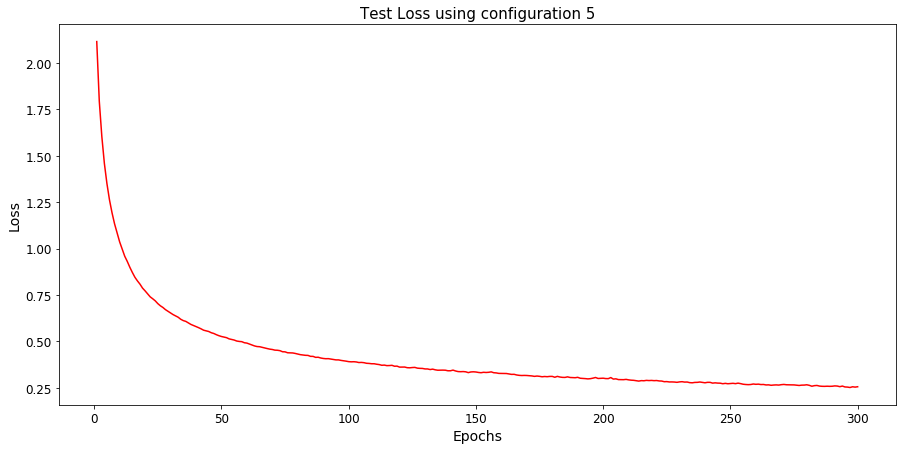

In [49]:
epochs = list(range(1,300+1))
loss= loss5
plt.figure(figsize=(15,7))
plt.title('Test Loss using configuration 5', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Loss', fontsize=14)
plt.tick_params(labelsize=12);
#plt.scatter(epochs,loss,alpha=1,c='green')
plt.plot(epochs,loss,c='red')

### Plotting Training Accuracies:

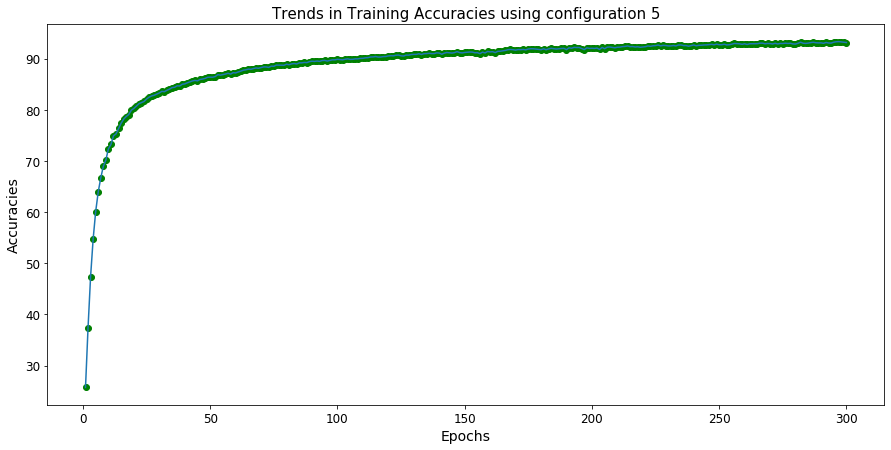

In [50]:
epochs = list(range(1,300+1))
accuracies= li5
plt.figure(figsize=(15,7))
plt.title('Trends in Training Accuracies using configuration 5', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(epochs,accuracies,alpha=1,c='green')
plt.plot(epochs,accuracies)

### Evaluating on Validation Test data using Configuration 5 :

In [51]:
labely_test,labelpred=testing(W2,b2,W1,b1,X_testval,y_testval,tanh)
accuracy_val=accuracy(labely_test, labelpred)
print("Accuracy on Validation data using configuration 5: {}%".format(accuracy_val))
acc5=accuracy_val

Accuracy on Validation data using configuration 5: 91.17%


## Compiling the training accuracy observations as a whole :

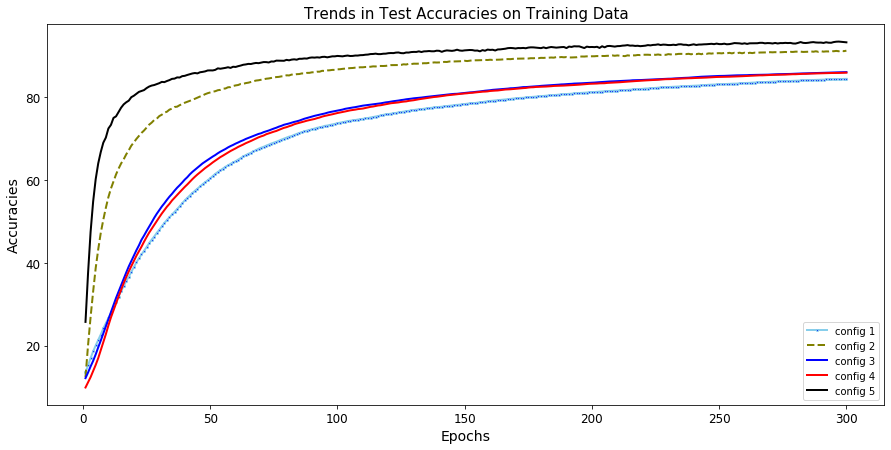

In [52]:
plt.figure(figsize=(15,7))
plt.title('Trends in Test Accuracies on Training Data', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.plot( epochs,li1, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=2, label="config 1")
plt.plot( epochs,li2, marker='', color='olive', linewidth=2,linestyle='dashed', label="config 2")
plt.plot(epochs,li3, marker='', color='blue', linewidth=2, label="config 3")
plt.plot(epochs,li4, marker='', color='red', linewidth=2, label="config 4")
plt.plot(epochs,li5, marker='', color='black', linewidth=2, label="config 5")
plt.legend()

* Here we can see that when used configuration 5, the model gives highest accuracy of predictions. By using tanh in configuration 5, we can see a steep curve with slight disturbances, converging to an optimal solution. The next best configuration was configuration 2 which used sigmoid activation function. 
* Although sigmoid showed great improvement in accuracy in the initial epochs, it performance increase slowly became almost constant showing signs of convergence after epoch 200. 
* A gradual increasing curve was observed after epoch 50. Configuration 3 and 4 almost showed same results. When used configuration 1, using 64 neurons, with a 0.01 learning rate,  the model performed poorly compared to other configurations.

## Compiling the training loss observations as a whole :

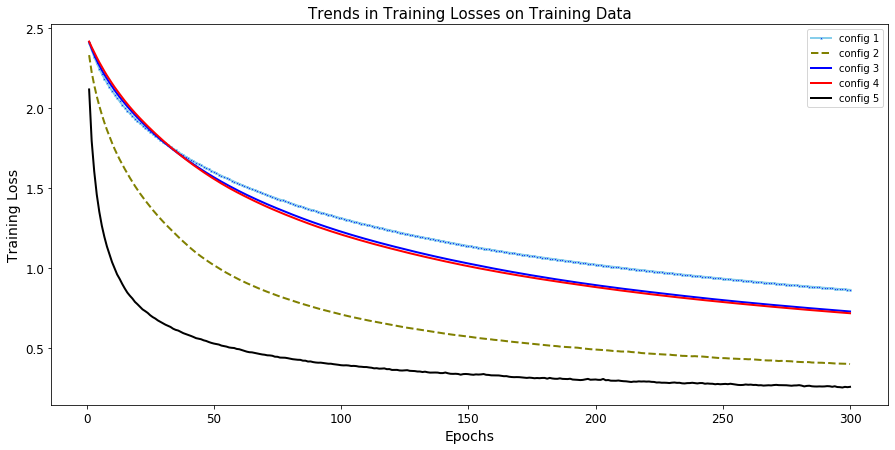

In [53]:
plt.figure(figsize=(15,7))
plt.title('Trends in Training Losses on Training Data', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Training Loss', fontsize=14)
plt.tick_params(labelsize=12);
plt.plot( epochs,loss1, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=2, label="config 1")
plt.plot( epochs,loss2, marker='', color='olive', linewidth=2,linestyle='dashed', label="config 2")
plt.plot(epochs,loss3, marker='', color='blue', linewidth=2, label="config 3")
plt.plot(epochs,loss4, marker='', color='red', linewidth=2, label="config 4")
plt.plot(epochs,loss5, marker='', color='black', linewidth=2, label="config 5")
plt.legend()

* Here we can see a significant decrease in training loss when used configuration 5, notice the steep curve. Tanh is in general a better activation function than sigmoid as it squeezes the values between -1 and 1. It is steeper and helps to converge to a better solution in less epochs. 
* Configuration 2 showed good results in accuracy with a continuous minimization in loss but still tanh stood out in terms of performance among all. Configurations 3 and 4 almost showed same results inspite of increasing the learning rates from 0.01 to 0.05 using 128 neurons.
* Configuration 1 performed poorly, with a 0.01 learning rate and 64 neurons compared to others since it learns slower that others. 

## Plotting Test accuracies with different learning rates:

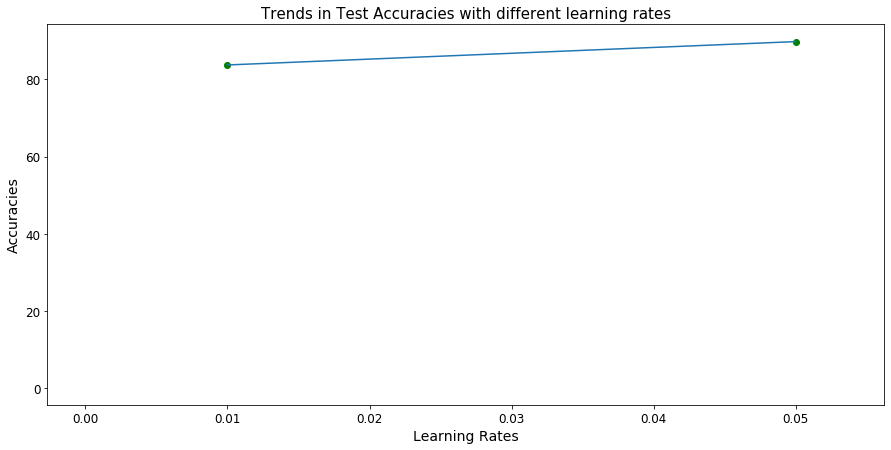

In [54]:
learning_rate=[0.01,0.05]
accuracies=[acc1,acc2]
plt.figure(figsize=(15,7))
width=0.25
plt.title('Trends in Test Accuracies with different learning rates', fontsize=15)
plt.xlabel('Learning Rates', size=14)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(learning_rate,accuracies,alpha=1,c='green')
plt.plot(learning_rate,accuracies,width)

* Here when I increased the learning rate from 0.01 to 0.05 keeping number of neurons same i.e 64, I observed a noticeable increase in accuracy. Hence as learning rate increased, the number of jumps the algorithm takes in order to reach a better solution increased.

## Plotting Test accuracies with different number of neurons :

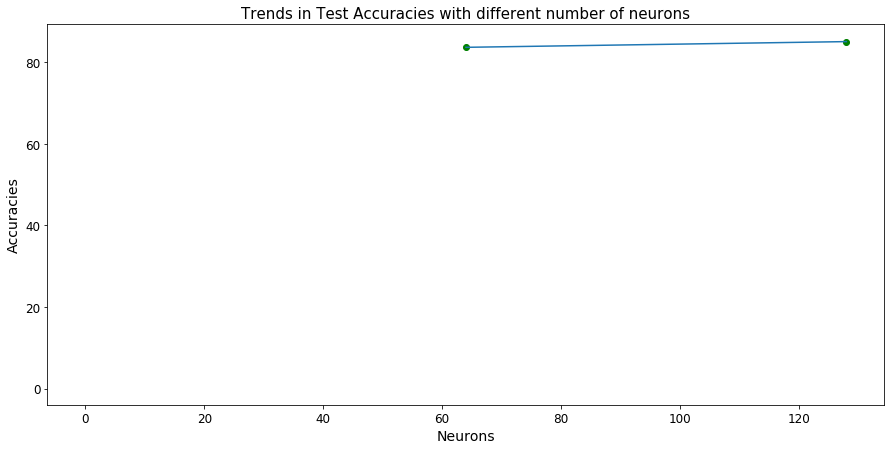

In [55]:
neurons=[64,128]
accuracies=[acc1,acc3]
plt.figure(figsize=(15,7))
width=0.25
plt.title('Trends in Test Accuracies with different number of neurons', fontsize=15)
plt.xlabel('Neurons', size=14)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(neurons,accuracies,alpha=1,c='green')
plt.plot(neurons,accuracies,width)

* Here when I increased the number of neurons from 64 to 128 keeping learning rate = 0.01, I observed and slight increase in the accuracy. 

In [56]:
acc2,acc5

(89.73, 91.17)

## Plotting Test accuracies using different activation functions :

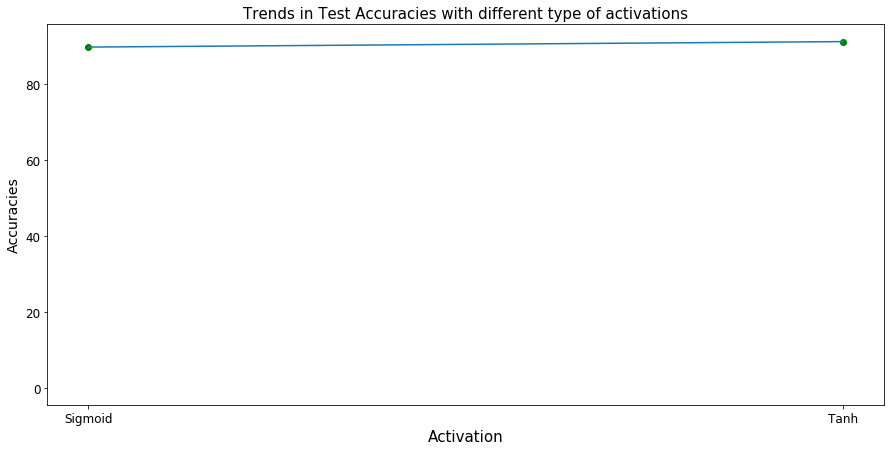

In [83]:
activation =['Sigmoid','Tanh']
accuracies=[acc2,acc5]
plt.figure(figsize=(15,7))
width=0.25
plt.title('Trends in Test Accuracies with different type of activations', fontsize=15)
plt.xlabel('Activation', size=15)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(activation,accuracies,alpha=1,c='green')
plt.plot(activation,accuracies,width)

* Here we can see a noticeable increase in model performance when we used Tanh activation function.Tanh curve is steeper than the sigmoid curve, one of the reasons it helps the algorithm to converge is less number of epochs than sigmoid. 

## Plot to see trends in accuracies over all configurations :

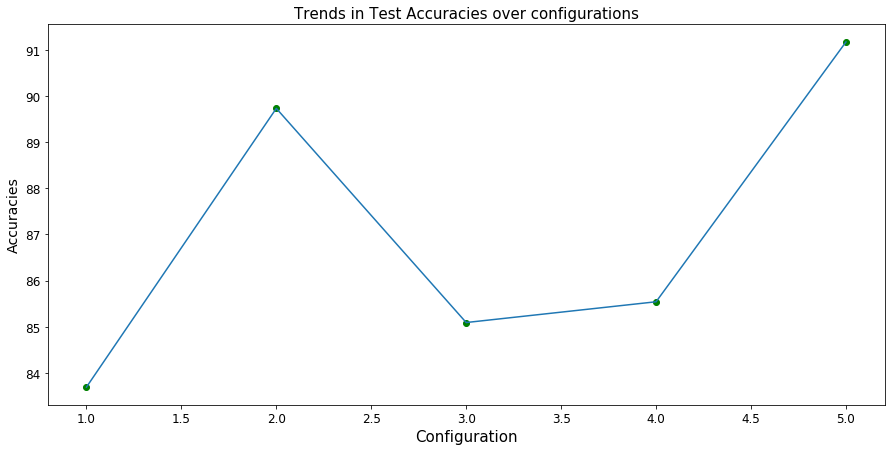

In [58]:
configurations = [1,2,3,4,5]
accuracies= [acc1,acc2,acc3,acc4,acc5]
plt.figure(figsize=(15,7))
plt.title('Trends in Test Accuracies over configurations', fontsize=15)
plt.xlabel('Configuration', size=15)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(configurations,accuracies,alpha=1,c='green')
plt.plot(configurations,accuracies)


### Observations :
* Here we can see after taking into account all the results obtained using all possible configurations by tweaking Learning rates and number of  and type of non-linerity activation function in the hidden layer, we observed that our model performed very well when we used configurations 2 and 5. With a learning rate of 0.05 and using a tanh activation function with 64 neurons, configuration 5 proves to be the best configuration out of the others. Hence we will be using the best configuration out of the two that is configuration 5 on our model to achieve good results.

# Q3A :

## Convergence Criteria :
* For each configuration, the Testing function simply takes the updated weights retrieved from training function and runs our model on validation data thus returning probabilities of class labels. 
* Further, after taking argmax of the outputs, accuracy is calculated on validation data. After each epoch I calculated loss and computed gradient so that I can back propogate this information to tune my weight parameters for 300 epochs in order to minimize loss and increase model performance. I then tested my model since after 300th epoch, it was observed that the although the training accuracy was gradually increasing, the model showed almost no improvement in performance and no decrease in loss, that is, it has reached the point of convergence. 
 

# Question 4 :
* After evaluating our model on Validation dataset using 4 configurations we will be training our model using the best configuration that is configuration 5 on our entire original Training dataset of 60,000 samples. Furthermore, we will evaluate our model on original Test data consisting of 10,000 samples.

## Final Configuration Used :
* Number of neurons = 64
* Learning rate = 0.05
* Iteratations =300
* Activation Function : tanh

### Training our model using Configuration 5 on Entire Training Data :

In [59]:
X_train.shape, y_test.shape

((60000, 784), (10000,))

In [60]:
W2,b2,W1,b1,accu_train,losstrain=training(X_train,y_train,64,0.05,300,tanh,tanh_derivative)

Epoch 1: training loss = 2.1024780307262314
Training Accuracy after Epoch 1 : 27.22%
Epoch 2: training loss = 1.8053222695431461
Training Accuracy after Epoch 2 : 39.16%
Epoch 3: training loss = 1.629256187615629
Training Accuracy after Epoch 3 : 48.29%
Epoch 4: training loss = 1.4941172963727611
Training Accuracy after Epoch 4 : 54.53%
Epoch 5: training loss = 1.3777496672156235
Training Accuracy after Epoch 5 : 59.99%
Epoch 6: training loss = 1.286307365621494
Training Accuracy after Epoch 6 : 63.36%
Epoch 7: training loss = 1.209599088108945
Training Accuracy after Epoch 7 : 66.75%
Epoch 8: training loss = 1.1498263773504298
Training Accuracy after Epoch 8 : 68.46%
Epoch 9: training loss = 1.097285114911421
Training Accuracy after Epoch 9 : 70.87%
Epoch 10: training loss = 1.0540841435722859
Training Accuracy after Epoch 10 : 72.1%
Epoch 11: training loss = 1.0126663252458725
Training Accuracy after Epoch 11 : 73.54%
Epoch 12: training loss = 0.9756923000663819
Training Accuracy aft

Epoch 96: training loss = 0.39965551880935685
Training Accuracy after Epoch 96 : 89.66%
Epoch 97: training loss = 0.3963372804670967
Training Accuracy after Epoch 97 : 89.8%
Epoch 98: training loss = 0.39521782360935126
Training Accuracy after Epoch 98 : 89.77%
Epoch 99: training loss = 0.39384427111526776
Training Accuracy after Epoch 99 : 89.86%
Epoch 100: training loss = 0.39240629895326634
Training Accuracy after Epoch 100 : 89.8%
Epoch 101: training loss = 0.3898306696094746
Training Accuracy after Epoch 101 : 89.98%
Epoch 102: training loss = 0.38904468832443656
Training Accuracy after Epoch 102 : 89.92%
Epoch 103: training loss = 0.38816398934389496
Training Accuracy after Epoch 103 : 89.98%
Epoch 104: training loss = 0.3853343671114038
Training Accuracy after Epoch 104 : 89.98%
Epoch 105: training loss = 0.38597877618884
Training Accuracy after Epoch 105 : 89.9%
Epoch 106: training loss = 0.383101616422868
Training Accuracy after Epoch 106 : 90.06%
Epoch 107: training loss = 0.

Epoch 188: training loss = 0.3115271653106749
Training Accuracy after Epoch 188 : 91.58%
Epoch 189: training loss = 0.31067483383146793
Training Accuracy after Epoch 189 : 91.74%
Epoch 190: training loss = 0.3089098749447043
Training Accuracy after Epoch 190 : 91.7%
Epoch 191: training loss = 0.31135883356590033
Training Accuracy after Epoch 191 : 91.68%
Epoch 192: training loss = 0.3107422115195289
Training Accuracy after Epoch 192 : 91.61%
Epoch 193: training loss = 0.3084459471480027
Training Accuracy after Epoch 193 : 91.8%
Epoch 194: training loss = 0.3079236016784309
Training Accuracy after Epoch 194 : 91.7%
Epoch 195: training loss = 0.30731457807742113
Training Accuracy after Epoch 195 : 91.78%
Epoch 196: training loss = 0.30867653958193
Training Accuracy after Epoch 196 : 91.68%
Epoch 197: training loss = 0.30603642387877433
Training Accuracy after Epoch 197 : 91.73%
Epoch 198: training loss = 0.30297833784443673
Training Accuracy after Epoch 198 : 91.9%
Epoch 199: training lo

Epoch 280: training loss = 0.2699296428936594
Training Accuracy after Epoch 280 : 92.61%
Epoch 281: training loss = 0.2700625446547077
Training Accuracy after Epoch 281 : 92.61%
Epoch 282: training loss = 0.2721270436740871
Training Accuracy after Epoch 282 : 92.6%
Epoch 283: training loss = 0.27054919117844445
Training Accuracy after Epoch 283 : 92.54%
Epoch 284: training loss = 0.2669235003746055
Training Accuracy after Epoch 284 : 92.71%
Epoch 285: training loss = 0.2680753148670171
Training Accuracy after Epoch 285 : 92.63%
Epoch 286: training loss = 0.2660688643813471
Training Accuracy after Epoch 286 : 92.73%
Epoch 287: training loss = 0.26513470752042917
Training Accuracy after Epoch 287 : 92.79%
Epoch 288: training loss = 0.2644742502419283
Training Accuracy after Epoch 288 : 92.81%
Epoch 289: training loss = 0.2628703990605833
Training Accuracy after Epoch 289 : 92.9%
Epoch 290: training loss = 0.26122164818858995
Training Accuracy after Epoch 290 : 92.92%
Epoch 291: training 

### Test Loss:

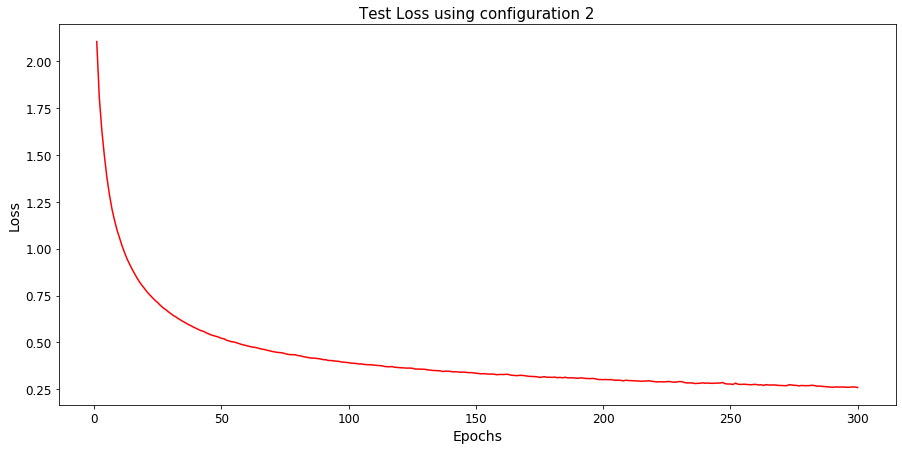

In [61]:
epochs = list(range(1,300+1))
loss= losstrain
plt.figure(figsize=(15,7))
plt.title('Test Loss using configuration 2', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Loss', fontsize=14)
plt.tick_params(labelsize=12);
#plt.scatter(epochs,loss,alpha=1,c='green')
plt.plot(epochs,loss,c='red')


* Here we can see that the loss is decreasing gradually, that is our model is learning by taking into consideration the loss at after each iteration, and then computing the change in loss w.r.t weights. This gradient information is computed and back propogated to the hidden layers and input layer. Using this information, weights are updated again and these weights are used in feed forward network for the next iteration. In this way our model learns from the loss obtained after each epoch so that it performs better in the next epoch thus significantly reducing the loss and increasing performance of our model. 

### Plotting Training Accuracies :

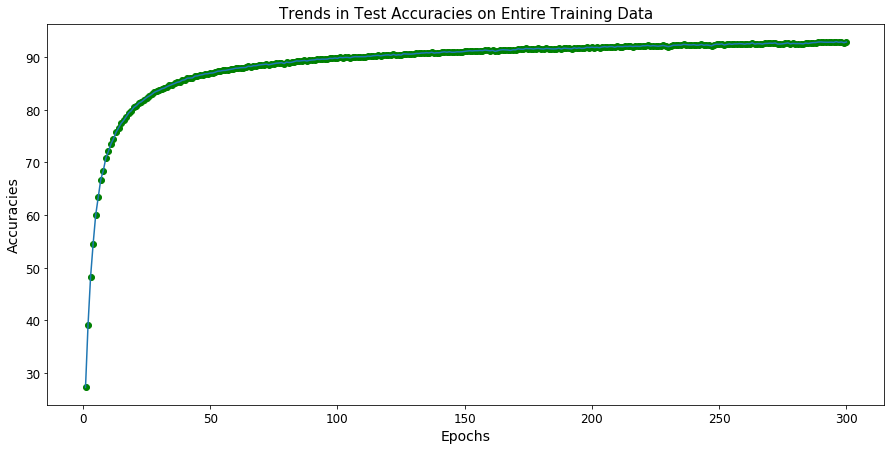

In [62]:
epochs = list(range(1,300+1))
accuracies= accu_train
plt.figure(figsize=(15,7))
plt.title('Trends in Test Accuracies on Entire Training Data', fontsize=15)
plt.xlabel('Epochs', size=14)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(epochs,accuracies,alpha=1,c='green')
plt.plot(epochs,accuracies)

* Here we can see a significant increase in our training accuracies using tanh activation function.Tanh curve is steeper than the sigmoid curve, one of the reasons it helps the algorithm to converge is less number of epochs than sigmoid. 

### Evaluating on Entire Test data :

In [63]:
labely_test,labelpred=testing(W2,b2,W1,b1,X_test,y_test,tanh)
accuracy_val=accuracy(labely_test, labelpred)
print("Accuracy on Entire Testing data using configuration 5: {}%".format(accuracy_val))

Accuracy on Entire Testing data using configuration 5: 91.69%


* We can see here that our model has performed significantly well on our Test data with a 91.69% accuracy. As our algorithm steps in further iterations, it's loss gradually decreases compared to the initial iterations where we can see a noticeable increase in accuracy and decrease in loss. With a 0.05 learning rate, slowly our algorithm tries to converge to a better solution. 

# Q3A: continued..

## Code Implementation :

* Here I have implemented a Multiclass Neural Network classifier with one hidden layer. I have used idx2numpy library to convert the input file into a numpy array for conveneince. I reshaped the original training and testing data of dimensions (60,000 * 28 * 28) into 2D numpy array 60000 * 784. I have split the original Training data in ratio 70: 30 into training and validation data for Q3. 
* Each of the inputs will be connected with each of the following layer hidden neurons and will have an associated weight with it. Further each of the neurons in the hidden layer will be connected to each of the output layer neurons/class labels. Hence, I have initialized random weights and first set the bias to zero.
* In the training function, our model will learn based on our training data. First, weights and bias will be initialized. Then in Feed Forward function we simply take the weights and bias and each of our input instances and compute the dot product of each feature vector in input data with all the weight vectors and add bias. 
* This outcome is passed through a non-linearity activation function. Here I have used two functions, Sigmoid and Tanh. This intermediate output is then carried forward in our network.
* This intermediate output acting as input for the next layer, i.e the output layer. Dot product of this intermediate output with new weight vectors will be computed along with adding bias. The final outcome at the output layer will be then passed through another non-linearity activation function called as Softmax function which squeezes all the outcomes between 0 and 1 such that they all add up to 1. Hence what we receive is 10 probabilites for each instance which implies the probabilites that the input instance belongs to the class labels.
* Loss is computed at each epoch using Cross entropy loss since it is used to deal with computing losses of outcomes that are in the form of probabilites. Backpropogation function calculates loss i.e error of each predicted output, and then computes the change in loss with respect to weights at each layer(gradient). I have used Stochastic Gradient Descent Algorithm where I m feeding in each sample and computing loss and then change in loss w.r.t weights. This gradient information is sent back to the hidden layers so that the weights can get updated using Update Weights function for the next run. 
* Accuracy for each epoch is calculated by comparing argmax of each output vector (which is our corresponding class label) and the true class labels. 
* In such way, our model keeps learning from the loss gradually, and we notice an increase in accuracy for training data.
* Using each of the mentioned configurations ,we evaluate our model on validation data to check which configuration gives a better performance of our model. 
* Hence I used the best configuration, 5th configuration and using this one, I trained my model using the entire training data 60000 instances and then evaluated it on my test data having 10,000 images and noted accuracy.

<div style="text-align: center">
 
# PERCEPTRON  <br>
</div>
<div style="text-align: justify">

Here my baseline model is my previous implementation of Single layer Multiclass Perceptron to compare its performance with current Neural Network Classifier. Here I will evaluate both the model's performance on the same MNIST data and record my observations for the same :

### Function to prepend 1 to input data for bias term :

In [64]:
def add_ones(X): 
    return np.hstack((np.ones((X.shape[0], 1),dtype=int), X)) 

In [65]:
X_train=add_ones(X_train)
X_test=add_ones(X_test)
X_train.shape, X_test.shape

((60000, 785), (10000, 785))

## Training Function :

In [66]:

    def trainingP(X_train, y_train):
        
        dotprod=np.ndarray(10,dtype=np.float32)
        weights=np.zeros((10,X_train.shape[1]), dtype=np.float32)
        iterations=300                           # Number of epochs
        alpha=0.05                              # Learning Rate
        accu=[]
        co=[]
        for iter in range(iterations) : 
            count=0
            for i in range(X_train.shape[0]): # iterating through each feature vector
                for j in range(10):     # weight vectors equivalent to 10 class labels 
                    dotprod[j] = np.dot(X_train[i],weights[j])
        
                ind=y_train[i]                 # true class label
                maxi=np.argmax(dotprod,axis=None)
                y_pred=maxi             # got predicted corresponding class label
       
                if(y_pred!=y_train[i]):
                #subtracting x input from old weight vector coress to predicted label 
                    weights[maxi] -= alpha*X_train[i]
                  
                #adding x input to old weight vector coress to true label 
                    weights[ind] += alpha*X_train[i]
                    
                elif(y_pred==y_train[i]):
                    count=count+1
                    
            accuracy = round(((count/y_train.shape[0])*100), 2)
            print("Accuracy after epoch "+ str(iter)  + " is : ",accuracy)
            accu.append(accuracy)
            
            co.append(count)
            
 
        return weights

## Testing Function :

In [67]:
    def testingP(X_test,w):
        
        ypred=[]
        activ=[]
        activ=np.dot(X_test,w.T)     #calculating activation
        
        for i in range(activ.shape[0]):
            ypred.append(np.argmax(activ[i]))

        return ypred           #predicted class label

In [68]:
y_trainnew.shape, X_train.shape

((60000,), (60000, 785))

In [69]:
w=trainingP(X_train, y_trainnew)  #got updated weights

Accuracy after epoch 0 is :  85.61
Accuracy after epoch 1 is :  87.72
Accuracy after epoch 2 is :  88.17
Accuracy after epoch 3 is :  88.24
Accuracy after epoch 4 is :  88.56
Accuracy after epoch 5 is :  88.58
Accuracy after epoch 6 is :  88.6
Accuracy after epoch 7 is :  88.84
Accuracy after epoch 8 is :  88.72
Accuracy after epoch 9 is :  88.97
Accuracy after epoch 10 is :  89.03
Accuracy after epoch 11 is :  88.98
Accuracy after epoch 12 is :  89.05
Accuracy after epoch 13 is :  89.11
Accuracy after epoch 14 is :  88.98
Accuracy after epoch 15 is :  89.1
Accuracy after epoch 16 is :  89.04
Accuracy after epoch 17 is :  89.28
Accuracy after epoch 18 is :  89.23
Accuracy after epoch 19 is :  89.19
Accuracy after epoch 20 is :  89.25
Accuracy after epoch 21 is :  89.28
Accuracy after epoch 22 is :  89.49
Accuracy after epoch 23 is :  89.27
Accuracy after epoch 24 is :  89.35
Accuracy after epoch 25 is :  89.39
Accuracy after epoch 26 is :  89.37
Accuracy after epoch 27 is :  89.28
Accu

Accuracy after epoch 225 is :  90.03
Accuracy after epoch 226 is :  89.83
Accuracy after epoch 227 is :  89.93
Accuracy after epoch 228 is :  89.95
Accuracy after epoch 229 is :  89.89
Accuracy after epoch 230 is :  89.94
Accuracy after epoch 231 is :  90.03
Accuracy after epoch 232 is :  89.82
Accuracy after epoch 233 is :  90.0
Accuracy after epoch 234 is :  89.84
Accuracy after epoch 235 is :  89.85
Accuracy after epoch 236 is :  89.89
Accuracy after epoch 237 is :  89.97
Accuracy after epoch 238 is :  89.94
Accuracy after epoch 239 is :  90.01
Accuracy after epoch 240 is :  89.91
Accuracy after epoch 241 is :  89.83
Accuracy after epoch 242 is :  89.89
Accuracy after epoch 243 is :  90.07
Accuracy after epoch 244 is :  89.96
Accuracy after epoch 245 is :  89.97
Accuracy after epoch 246 is :  89.88
Accuracy after epoch 247 is :  89.91
Accuracy after epoch 248 is :  90.0
Accuracy after epoch 249 is :  89.94
Accuracy after epoch 250 is :  89.98
Accuracy after epoch 251 is :  89.91
Acc

### Accuracy Calculation for Training Data:

In [70]:
predictions_for_Training=testingP(X_train,w)         

In [71]:
count=0
for i in range(y_trainnew.shape[0]):
    if predictions_for_Training[i]==y_trainnew[i]:
        count=count+1
print("Number of samples correctly classified for training data : ", count)
print('Accuracy in % :', accuracy_score(y_trainnew,predictions_for_Training)*100)

Number of samples correctly classified for training data :  53260
Accuracy in % : 88.76666666666667


### Accuracy Calculation for Testing Data :

In [72]:
predictions_for_Testing=testingP(X_test,w)

In [73]:
count=0
for i in range(y_test.shape[0]):
    if predictions_for_Testing[i]==y_test[i]:
        count=count+1

print("Number of samples correctly classified for testing data : ", count)
print('Accuracy in % :', accuracy_score(y_test,predictions_for_Testing)*100)

Number of samples correctly classified for testing data :  8716
Accuracy in % : 87.16000000000001


## Perceptron Code Explanation :

* Here I have implemented a single layer, Multi-class perceptron. I have prepended a column of 1's to the input data for simplification in case of bias term. A numpy weight array of dimensions(10,785) where (785 since 784 dimensions + bias term) has been declared.

* In the training function, our model will learn based on our training data. With learning rate of 0.01 at each epoch, it calculates the dot product of each feature vector in input data with all the 10 weight vectors coressponding to the given 10 class labels. The index of the maximum dot product-value will be our coressponding  predicted class label.


* If our predictions are correct, then simply store the count of correct prediction at each iteration. But if our prediction is incorrect, then the weights for the correct class are increased by x and the weights for the incorrectly predicted class are decreased by x. 

* Keep updating the weights for each iterations/epoch and compute the training accuracy to see variations. We will see that the accuracy has increased gradually. 

* But after a certain epoch, we may see that accuracy tends to be almost 100% that is tends to overfit our model on training data and perform poorly on testing data.

* Testing function simply takes these updated weights retrieved from training function and runs our model on test data thus returning predicted class labels. 
* Further, accuracy is calculated for test data. I have tuned my weight parameters for 800 epochs and then tested my model since after th epoch, it was observed that the although the training accuracy was substantially increasing, the testing accuracy began to decline noticably, that is, it was trying to overfit the model. 


## Results Comparison between NN Classifier vs Perceptron:
* As we can see here that when I tested my data on both the models, Neural Network Classifier and Multiclass Single layer Perceptron, we could see thart Neural Network Classifier performed very well compared to the Multiclass Perceptron. 
* By evaluating our Neural Network Classifier on Test data, we achieved the accuracy of 91.69% compared to when we tested our Multiclass Perceptron where the test accuracy was less, 87.16%. Here, in the latter model, there are no hidden layers involved.
* Single Layer Perceptrons are used for classfying linearly separable data. The dot product of input values with weights are computed and weights are updated in a linear fashion. Whereas Neural Network Classifiers can be used to classify linearly inseparable data using hidden layers and Non-linearity Activation Functions such that it learns to handle and classify complex data correctly. As more hidden layers are added to the Neural Network, the model becomes more complex and deep so that it can deal with different type of data and yet yield a better performance in classifying complex data correctly.

# Q3 B Validating the implementation :
* I am validating my algorithm implemetation by running my algorithm on XOR(linearly inseparable) data which consists of binary inputs i.e 1s and 0s. and gives either 0 or 1 as output. A basic XOR gives output as 0 if both inputs are same and gives output as 1 if both inputs are different. 

### Input data :

In [74]:
X_xor= np.array([[0,0,0,0],
                    [0,0,0,1],
                    [0,0,1,0],
                    [0,0,1,1],
                    [0,1,0,0],
                    [0,1,0,1],
                    [0,1,1,0],
                    [0,1,1,1],
                    [1,0,0,0],
                    [1,0,0,1],
                    [1,0,1,0],
                    [1,0,1,1],
                    [1,1,0,0],
                    [1,1,0,1],
                    [1,1,1,0],
                    [1,1,1,1]])

### Output Class Labels :

In [75]:
y_xor=np.array([0,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0])

### Splitting the data into training and testing data:

In [76]:
X_trainxor,X_testxor,y_trainxor,y_testxor=train_test_split(X_xor,y_xor,test_size=0.3, random_state=42)

In [77]:
X_trainxor.shape, y_trainxor.shape

((11, 4), (11,))

In [78]:
y_trainxor = pd.get_dummies(y_trainxor)
y_trainxor=np.array(y_trainxor)

### Using our Neural Network Classifer :

In [79]:
def trainingxor(X_t,y_t,neurons,lr,iterations,actfunc,derivfunc):
    hNeurons=neurons                              #hidden neuron
    inputs=X_t.shape[1]                   #number of inputs
    oNeurons=2
    alpha= lr                       #learning rate
    epochs=iterations
    
    #retriving the actual labels for y_train:
    labely_train=np.argmax(y_t,axis=1)
    
    #initialize weights
    W1, b1, W2, b2= initialize_weights(inputs,hNeurons,oNeurons)
    li=[]
    listloss=[]
    for i in range(epochs):
        
        #feed forward
        dotprod1, h1, dotprod2, output=feedforward(X_t,W1,b1,W2,b2,actfunc)

        #back propogate
        delta_W2, delta_b2, delta_W1, delta_b1= backpropagation(h1,W2,output,y_t,X_t,derivfunc)
        
        #update weights using gradient descent
        W2,b2,W1,b1=update_weights(alpha,W1,b1,W2,b2,delta_W2,delta_b2,delta_W1,delta_b1)

        #again feed forward using updated weights
        dotprod1, h1, dotprod2, output=feedforward(X_t,W1,b1,W2,b2,actfunc)

        #Calculating Total Loss
        loss=crossentropy(output,y_t)                 # put in training func later
        print("Epoch {}: training loss = {}".format(i + 1,loss))
        listloss.append(loss)

        #Retrieving the corresponding class labels:
        labelpred=np.argmax(output,axis=1)
        
        #Training Accuracy:
        accuracy = round((accuracy_score(labely_train, labelpred)*100),2)
        print("Training Accuracy after Epoch {} : {}%".format(i+1, accuracy))
        li.append(accuracy)
        
    return W2,b2,W1,b1,li,listloss
        



In [80]:
W2,b2,W1,b1,accu_xor,lossX_trainxor = trainingxor(X_trainxor,y_trainxor,2,0.001,40,tanh,tanh_derivative)

Epoch 1: training loss = 0.701676777190939
Training Accuracy after Epoch 1 : 45.45%
Epoch 2: training loss = 0.7016659170745927
Training Accuracy after Epoch 2 : 45.45%
Epoch 3: training loss = 0.7016550691386835
Training Accuracy after Epoch 3 : 45.45%
Epoch 4: training loss = 0.7016442333679873
Training Accuracy after Epoch 4 : 45.45%
Epoch 5: training loss = 0.7016334097472993
Training Accuracy after Epoch 5 : 45.45%
Epoch 6: training loss = 0.701622598261435
Training Accuracy after Epoch 6 : 45.45%
Epoch 7: training loss = 0.7016117988952294
Training Accuracy after Epoch 7 : 45.45%
Epoch 8: training loss = 0.7016010116335373
Training Accuracy after Epoch 8 : 45.45%
Epoch 9: training loss = 0.7015902364612339
Training Accuracy after Epoch 9 : 45.45%
Epoch 10: training loss = 0.7015794733632135
Training Accuracy after Epoch 10 : 45.45%
Epoch 11: training loss = 0.7015687223243906
Training Accuracy after Epoch 11 : 45.45%
Epoch 12: training loss = 0.7015579833296995
Training Accuracy 

### Evaluating the classifier on Test data :

In [81]:
labely_test,labelpred=testing(W2,b2,W1,b1,X_testxor,y_testxor,tanh)
accuracy_val=accuracy(labely_test, labelpred)
print("Accuracy on Entire Testing data using configuration 5: {}%".format(accuracy_val))

Accuracy on Entire Testing data using configuration 5: 100.0%


### Observations :

* Here after validating our model by training our same model for 40 epochs and then testing on XOR data which is linearly inseparable, we can see that it has very well classfied these linearly inseparable data which is impossible in case of single layer multiclass perceptron which classifies only Linearly separable data. Hence, this proves that our algorithm implementation for Neural Network Classifier is correct giving valid outcomes and efficient performance. 